# TUGAS 5 - REINFORCEMENT LEARNING
# PARTICLE SWARM OPTIMIZATION IMPLEMENTATION

## Nama Anggota: 
## Anggito Anju Hartawan Manalu - 5025201216
## Eldenabih Tavirazin Lutvie - 5025201213
## Aqil Ramadhan Hadiono - 5025201261
## Sayid Ziyad Ibrahim Alaydrus - 5025201147

## Kelas    : Kecerdasan Komputasional F

## **Implementasi Algoritma Particle Swarm Optimization (PSO) di Python**

Tujuan atau goal kita adalah untuk menemukan titik minimum dari fungsi tertentu. Dalam hal ini, fungsinya adalah f(x,y) = x² + y² + 1. Dengan demikian, algoritma akan bekerja dengan array posisi 2 dimensi dan nilai fitnessnya adalah koordinat Z. Maka kita tahu bahwa target kita adalah menemukan koordinat [0,0] yang merupakan minimum dari f(x,y).

Untuk mengimplementasikan algoritma dalam python digunakan OOP. Mula-mula inisialisasi library numpy untuk menangani operasi array setelah kita bekerja dengan ruang multidimensi.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# **Kelas Particle**

Kelas Partikel terdiri dari 3 metode:
1.   Init : Ketika Partikel dimulai secara otomatis, kita mengurutkan 2 posisi terbatas dalam kisaran -50 hingga +50. Pbest_position (yang merupakan posisi individu terbaik dari partikel itu) dimulai dengan posisi awal. Dan saat kita mencari nilai minimum, pbest_value dimulai dengan +inf (bisa berupa nilai yang lebih besar).
2.   Str (cetak string): metode __str__() hanya untuk mencetak posisi aktual dan nilai individual terbaik. 
1.  Metode move() menambahkan vektor posisi dan kecepatan dimensi yang dihitung
dalam pencarian seperti yang akan kita lihat di depan

In [2]:
class Particle():
    def __init__(self):
        self.position = np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])

    def __str__(self):
        print("Posisi ", self.position, " pbest : ", self.pbest_position)
    
    def move(self):
        self.position = self.position + self.velocity

# **Kelas** **Search Space** 

Search Space (Ruang Pencarian) adalah entitas yang mengontrol rutinitas algoritma. Dalam implementasi ini, bertanggung jawab untuk menjaga semua partikel, mengidentifikasi dan menetapkan nilai posisi terbaik individu dari semua partikel, mengelola kriteria kesalahan target, menghitung nilai global terbaik, dan menetapkan posisi global terbaik. 

Metode **set_pbset** dan **set_gbest** memiliki cara implementasi yang serupa. Mula-mula ia melewati semua partikel dan menghitung nilai fitness dari posisi partikel dan membandingkan dengan posisi individu terbaik (di **set_pbest**) dan posisi global terbaik (di **set_gbest**).

Dalam hal ini, fungsi fitness menghitung hasil f(x,y) = x² + y² + 1, dimana x = particle.position[0] dan y=particle.position[1]

Metode **move_particles** menghitung kecepatan vektor baru untuk setiap partikel di setiap dimensi seperti yang telah dijelaskan sebelumnya.

In [3]:
class Space():

    def __init__(self, target, target_error, n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50, random.random()*50])

    def print_particles(self):
        for particle in self.particles:
            particle.__str__()
   
    def fitness(self, particle): 
        return particle.position[0] ** 2 + particle.position[1] ** 2 + 1

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + \
                            (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()

## **Main loop**

Mula-mula dimulai Search Space dengan target 1. Target ini merepresentasikan target pada nilai fitness, artinya target adalah f(x,y) = 1. Algoritma kemudian akan mencari nilai x dan y yang memberikan hasil sama dengan 1 seperti yang ditunjukkan sebelumnya pada bentuk fungsi yang ingin kita cari minimum. Plot Kontur juga menunjukkan kepada kita bahwa nilai yang ingin kita cari adalah [0,0]. 

Jumlah Iterasi, Target error dan jumlah partikel (n_particles) diatur oleh pengguna. Kemudian dengan generator list memulai semua partikel dan setelah memulai iterasi.
Selanjutnya kita juga bisa menampilkan kurva error di setiap iterasi.

In [4]:
W = 0.5
c1 = 0.8
c2 = 0.9 

n_iterations = int(input("Jumlah iterasi: "))
target_error = float(input("target error: "))
n_particles = int(input("Jumlah partikel: "))

Jumlah iterasi: 100
target error: 0.0001
Jumlah partikel: 5000


Posisi  [-35.34894772 -27.60493143]  pbest :  [-35.34894772 -27.60493143]
Posisi  [  2.80425086 -31.90252897]  pbest :  [  2.80425086 -31.90252897]
Posisi  [ 34.18437124 -13.55123796]  pbest :  [ 34.18437124 -13.55123796]
Posisi  [ -8.94242889 -35.29444114]  pbest :  [ -8.94242889 -35.29444114]
Posisi  [-11.85300081  19.9430032 ]  pbest :  [-11.85300081  19.9430032 ]
Posisi  [-45.91296468  -8.94890476]  pbest :  [-45.91296468  -8.94890476]
Posisi  [-16.75788651  21.28480421]  pbest :  [-16.75788651  21.28480421]
Posisi  [-27.56854973  11.29391253]  pbest :  [-27.56854973  11.29391253]
Posisi  [ 0.69165441 16.94923929]  pbest :  [ 0.69165441 16.94923929]
Posisi  [ 5.78190615 17.68967666]  pbest :  [ 5.78190615 17.68967666]
Posisi  [-35.21160639  28.43100745]  pbest :  [-35.21160639  28.43100745]
Posisi  [-9.03867212 28.3472843 ]  pbest :  [-9.03867212 28.3472843 ]
Posisi  [41.42394443 -1.37155688]  pbest :  [41.42394443 -1.37155688]
Posisi  [-25.87094922 -20.78463462]  pbest :  [-25.870

Posisi  [ 46.95061766 -24.62688768]  pbest :  [ 46.95061766 -24.62688768]
Posisi  [39.95959402 37.31014199]  pbest :  [39.95959402 37.31014199]
Posisi  [-17.94569379 -33.50543027]  pbest :  [-17.94569379 -33.50543027]
Posisi  [46.13978044 11.06476099]  pbest :  [46.13978044 11.06476099]
Posisi  [-36.04267823   1.52305227]  pbest :  [-36.04267823   1.52305227]
Posisi  [-32.4009395 -38.6178549]  pbest :  [-32.4009395 -38.6178549]
Posisi  [-23.84551542 -38.31730716]  pbest :  [-23.84551542 -38.31730716]
Posisi  [-33.84649255 -12.64687398]  pbest :  [-33.84649255 -12.64687398]
Posisi  [42.51672203 28.9175394 ]  pbest :  [42.51672203 28.9175394 ]
Posisi  [ -4.55920237 -18.11313268]  pbest :  [ -4.55920237 -18.11313268]
Posisi  [16.69111517 13.01584787]  pbest :  [16.69111517 13.01584787]
Posisi  [ 2.26876467 -3.04071278]  pbest :  [ 2.26876467 -3.04071278]
Posisi  [ 25.30951608 -41.57560611]  pbest :  [ 25.30951608 -41.57560611]
Posisi  [32.51784333 -2.98545691]  pbest :  [32.51784333 -2.98

Posisi  [ 17.36350406 -39.92546148]  pbest :  [ 17.36350406 -39.92546148]
Posisi  [  1.16074093 -41.1745436 ]  pbest :  [  1.16074093 -41.1745436 ]
Posisi  [ 11.38787924 -47.33405542]  pbest :  [ 11.38787924 -47.33405542]
Posisi  [-27.47383888   4.02642258]  pbest :  [-27.47383888   4.02642258]
Posisi  [-41.13638201  26.40141632]  pbest :  [-41.13638201  26.40141632]
Posisi  [-8.20602489 -1.07140622]  pbest :  [-8.20602489 -1.07140622]
Posisi  [8.26468521 6.44336749]  pbest :  [8.26468521 6.44336749]
Posisi  [  1.76968922 -40.35826985]  pbest :  [  1.76968922 -40.35826985]
Posisi  [-14.64006197  42.61956137]  pbest :  [-14.64006197  42.61956137]
Posisi  [ 20.42075075 -23.68035046]  pbest :  [ 20.42075075 -23.68035046]
Posisi  [46.30809638 17.38984834]  pbest :  [46.30809638 17.38984834]
Posisi  [-5.90546835 -9.92592153]  pbest :  [-5.90546835 -9.92592153]
Posisi  [41.06483721 40.37775114]  pbest :  [41.06483721 40.37775114]
Posisi  [-29.47163065  44.70256884]  pbest :  [-29.47163065  4

Posisi  [ 49.40048599 -16.0318956 ]  pbest :  [ 49.40048599 -16.0318956 ]
Posisi  [ 34.88319803 -43.17742658]  pbest :  [ 34.88319803 -43.17742658]
Posisi  [-10.85237901  25.9149441 ]  pbest :  [-10.85237901  25.9149441 ]
Posisi  [ 3.30935745 23.58117816]  pbest :  [ 3.30935745 23.58117816]
Posisi  [-38.01107326  16.96293044]  pbest :  [-38.01107326  16.96293044]
Posisi  [-37.01424429  19.3155078 ]  pbest :  [-37.01424429  19.3155078 ]
Posisi  [-33.59093265  29.1325605 ]  pbest :  [-33.59093265  29.1325605 ]
Posisi  [ 6.54197133 29.50025038]  pbest :  [ 6.54197133 29.50025038]
Posisi  [ -1.12945235 -38.81369702]  pbest :  [ -1.12945235 -38.81369702]
Posisi  [ 47.19903854 -40.23116872]  pbest :  [ 47.19903854 -40.23116872]
Posisi  [-20.17715508 -11.10325298]  pbest :  [-20.17715508 -11.10325298]
Posisi  [28.56097332 24.03156166]  pbest :  [28.56097332 24.03156166]
Posisi  [49.56461348 44.24479359]  pbest :  [49.56461348 44.24479359]
Posisi  [ 7.45632079 24.66342722]  pbest :  [ 7.456320

Posisi  [35.00354547 -2.46672351]  pbest :  [35.00354547 -2.46672351]
Posisi  [-41.25055925 -42.3963798 ]  pbest :  [-41.25055925 -42.3963798 ]
Posisi  [-27.65314532  15.29349449]  pbest :  [-27.65314532  15.29349449]
Posisi  [-38.38727446 -26.47341066]  pbest :  [-38.38727446 -26.47341066]
Posisi  [-2.28680057 16.96608291]  pbest :  [-2.28680057 16.96608291]
Posisi  [ 14.83788322 -16.72475097]  pbest :  [ 14.83788322 -16.72475097]
Posisi  [ 0.85903299 26.96978483]  pbest :  [ 0.85903299 26.96978483]
Posisi  [-19.11353797   7.81455242]  pbest :  [-19.11353797   7.81455242]
Posisi  [ 10.06175336 -12.62715701]  pbest :  [ 10.06175336 -12.62715701]
Posisi  [32.96942539 15.47046799]  pbest :  [32.96942539 15.47046799]
Posisi  [3.69203003 5.2294849 ]  pbest :  [3.69203003 5.2294849 ]
Posisi  [12.95948373 -6.28843528]  pbest :  [12.95948373 -6.28843528]
Posisi  [ 26.30517187 -45.82547205]  pbest :  [ 26.30517187 -45.82547205]
Posisi  [-32.87798981 -33.3117465 ]  pbest :  [-32.87798981 -33.31

Posisi  [ 19.05533923 -17.94815268]  pbest :  [ 19.05533923 -17.94815268]
Posisi  [  4.28812209 -33.1066087 ]  pbest :  [  4.28812209 -33.1066087 ]
Posisi  [ 30.76363473 -41.11312674]  pbest :  [ 30.76363473 -41.11312674]
Posisi  [-10.86026072   5.10144163]  pbest :  [-10.86026072   5.10144163]
Posisi  [47.93120244  6.74870557]  pbest :  [47.93120244  6.74870557]
Posisi  [-27.76675809  12.38432559]  pbest :  [-27.76675809  12.38432559]
Posisi  [-27.42201187 -31.22084413]  pbest :  [-27.42201187 -31.22084413]
Posisi  [45.39697991 13.45273017]  pbest :  [45.39697991 13.45273017]
Posisi  [-18.70894476  -1.33843951]  pbest :  [-18.70894476  -1.33843951]
Posisi  [22.19429145  5.33702944]  pbest :  [22.19429145  5.33702944]
Posisi  [-7.71819006 30.4145386 ]  pbest :  [-7.71819006 30.4145386 ]
Posisi  [ 27.72668896 -35.70025827]  pbest :  [ 27.72668896 -35.70025827]
Posisi  [-29.69131954  -8.29050968]  pbest :  [-29.69131954  -8.29050968]
Posisi  [24.26315591 -0.59908081]  pbest :  [24.263155

Posisi  [38.38649615 45.00410235]  pbest :  [38.38649615 45.00410235]
Posisi  [-8.26243528 -0.65144734]  pbest :  [-8.26243528 -0.65144734]
Posisi  [ -1.79961428 -46.54930911]  pbest :  [ -1.79961428 -46.54930911]
Posisi  [ -6.90625391 -12.0349617 ]  pbest :  [ -6.90625391 -12.0349617 ]
Posisi  [-2.44869081 26.31918938]  pbest :  [-2.44869081 26.31918938]
Posisi  [ 7.33900952 11.62463479]  pbest :  [ 7.33900952 11.62463479]
Posisi  [ 10.82486448 -19.24621527]  pbest :  [ 10.82486448 -19.24621527]
Posisi  [-13.47850993  49.11393644]  pbest :  [-13.47850993  49.11393644]
Posisi  [15.60540393 29.57590952]  pbest :  [15.60540393 29.57590952]
Posisi  [28.4592723  -5.41964799]  pbest :  [28.4592723  -5.41964799]
Posisi  [36.83716425 -8.50533483]  pbest :  [36.83716425 -8.50533483]
Posisi  [47.58381209 45.04208823]  pbest :  [47.58381209 45.04208823]
Posisi  [-34.23948768 -19.00458355]  pbest :  [-34.23948768 -19.00458355]
Posisi  [ 49.40979206 -43.54253758]  pbest :  [ 49.40979206 -43.542537

Posisi  [-17.63509396 -28.08146886]  pbest :  [-17.63509396 -28.08146886]
Posisi  [44.81998447 40.54096504]  pbest :  [44.81998447 40.54096504]
Posisi  [33.21601776 11.54133948]  pbest :  [33.21601776 11.54133948]
Posisi  [-37.90788382 -40.31610608]  pbest :  [-37.90788382 -40.31610608]
Posisi  [ 18.3423589  -44.45082296]  pbest :  [ 18.3423589  -44.45082296]
Posisi  [-30.41225655 -29.36891023]  pbest :  [-30.41225655 -29.36891023]
Posisi  [-6.89513307  0.80856242]  pbest :  [-6.89513307  0.80856242]
Posisi  [-10.1685265    4.55847102]  pbest :  [-10.1685265    4.55847102]
Posisi  [36.80033089 49.03273485]  pbest :  [36.80033089 49.03273485]
Posisi  [33.43634008 37.23883852]  pbest :  [33.43634008 37.23883852]
Posisi  [-28.39480886 -27.36606489]  pbest :  [-28.39480886 -27.36606489]
Posisi  [ 9.7709362  18.42698338]  pbest :  [ 9.7709362  18.42698338]
Posisi  [44.39077171  6.13958724]  pbest :  [44.39077171  6.13958724]
Posisi  [  6.83814482 -37.89873425]  pbest :  [  6.83814482 -37.89

Posisi  [-4.46450572 -3.49315693]  pbest :  [-4.46450572 -3.49315693]
Posisi  [-7.00553555 27.53997288]  pbest :  [-7.00553555 27.53997288]
Posisi  [-44.03978018  14.31965156]  pbest :  [-44.03978018  14.31965156]
Posisi  [-14.94314175   4.22692559]  pbest :  [-14.94314175   4.22692559]
Posisi  [45.68836223  0.49941449]  pbest :  [45.68836223  0.49941449]
Posisi  [-23.38585402  15.12264975]  pbest :  [-23.38585402  15.12264975]
Posisi  [-39.6918378  -25.72052187]  pbest :  [-39.6918378  -25.72052187]
Posisi  [-43.46397365 -20.61858721]  pbest :  [-43.46397365 -20.61858721]
Posisi  [21.39680224 24.91989397]  pbest :  [21.39680224 24.91989397]
Posisi  [-22.39217392 -29.86970593]  pbest :  [-22.39217392 -29.86970593]
Posisi  [-16.52673933 -21.40863288]  pbest :  [-16.52673933 -21.40863288]
Posisi  [ 17.76136766 -42.63469458]  pbest :  [ 17.76136766 -42.63469458]
Posisi  [-17.59818302 -29.94859648]  pbest :  [-17.59818302 -29.94859648]
Posisi  [47.52671109 37.25876572]  pbest :  [47.526711

Posisi  [-18.00976373  39.98175124]  pbest :  [-18.00976373  39.98175124]
Posisi  [42.22862908 13.2996697 ]  pbest :  [42.22862908 13.2996697 ]
Posisi  [ 32.338184   -21.02277562]  pbest :  [ 32.338184   -21.02277562]
Posisi  [-2.32792434 19.35259955]  pbest :  [-2.32792434 19.35259955]
Posisi  [ 5.67697256 -0.67227673]  pbest :  [ 5.67697256 -0.67227673]
Posisi  [38.35770194 46.87195261]  pbest :  [38.35770194 46.87195261]
Posisi  [ 38.80671449 -21.53703565]  pbest :  [ 38.80671449 -21.53703565]
Posisi  [-44.70544927  -3.06473404]  pbest :  [-44.70544927  -3.06473404]
Posisi  [-44.21123465 -26.72169208]  pbest :  [-44.21123465 -26.72169208]
Posisi  [ -5.44430413 -40.37011149]  pbest :  [ -5.44430413 -40.37011149]
Posisi  [-47.85084121  17.88645669]  pbest :  [-47.85084121  17.88645669]
Posisi  [-32.67642835  18.61841643]  pbest :  [-32.67642835  18.61841643]
Posisi  [-34.90309904  37.32328009]  pbest :  [-34.90309904  37.32328009]
Posisi  [33.20982573 37.96348006]  pbest :  [33.209825

Posisi  [  2.63469232 -34.60090552]  pbest :  [  2.63469232 -34.60090552]
Posisi  [-37.4944636   49.56377048]  pbest :  [-37.4944636   49.56377048]
Posisi  [11.02923733  6.73859845]  pbest :  [11.02923733  6.73859845]
Posisi  [46.15951808 25.80483411]  pbest :  [46.15951808 25.80483411]
Posisi  [-31.55638952  32.38118589]  pbest :  [-31.55638952  32.38118589]
Posisi  [46.0780656   6.27706187]  pbest :  [46.0780656   6.27706187]
Posisi  [-18.01263586 -31.60745848]  pbest :  [-18.01263586 -31.60745848]
Posisi  [-22.81117641  47.34872999]  pbest :  [-22.81117641  47.34872999]
Posisi  [14.38751626 33.24982386]  pbest :  [14.38751626 33.24982386]
Posisi  [-26.20907291   9.14530498]  pbest :  [-26.20907291   9.14530498]
Posisi  [ 37.86096739 -28.20357825]  pbest :  [ 37.86096739 -28.20357825]
Posisi  [ 29.05356716 -19.9935689 ]  pbest :  [ 29.05356716 -19.9935689 ]
Posisi  [-14.19459667   2.52498971]  pbest :  [-14.19459667   2.52498971]
Posisi  [-9.33481851 31.30708741]  pbest :  [-9.334818

Posisi  [-20.98030328   8.74443488]  pbest :  [-20.98030328   8.74443488]
Posisi  [-6.06691518 17.63423422]  pbest :  [-6.06691518 17.63423422]
Posisi  [13.80564618 34.6961016 ]  pbest :  [13.80564618 34.6961016 ]
Posisi  [38.39432933 14.47301316]  pbest :  [38.39432933 14.47301316]
Posisi  [-49.74266283  19.27089548]  pbest :  [-49.74266283  19.27089548]
Posisi  [-33.65831006   2.74398756]  pbest :  [-33.65831006   2.74398756]
Posisi  [-3.61272344 -1.15633419]  pbest :  [-3.61272344 -1.15633419]
Posisi  [-38.19262717 -42.28807692]  pbest :  [-38.19262717 -42.28807692]
Posisi  [-30.57871919  48.90400241]  pbest :  [-30.57871919  48.90400241]
Posisi  [-41.99643742   8.89699904]  pbest :  [-41.99643742   8.89699904]
Posisi  [ 4.67630931e+01 -3.13990353e-02]  pbest :  [ 4.67630931e+01 -3.13990353e-02]
Posisi  [37.45045515 12.57831252]  pbest :  [37.45045515 12.57831252]
Posisi  [35.00487861 39.39761816]  pbest :  [35.00487861 39.39761816]
Posisi  [21.54844659 36.28531529]  pbest :  [21.54

Posisi  [19.77844283 -3.92789445]  pbest :  [19.77844283 -3.92789445]
Posisi  [29.49892466 48.27172391]  pbest :  [29.49892466 48.27172391]
Posisi  [ -3.7342459  -30.75497168]  pbest :  [ -3.7342459  -30.75497168]
Posisi  [-37.15981937  20.53284072]  pbest :  [-37.15981937  20.53284072]
Posisi  [-33.09622009  -1.56805012]  pbest :  [-33.09622009  -1.56805012]
Posisi  [-4.40293593 24.59451687]  pbest :  [-4.40293593 24.59451687]
Posisi  [40.43369843 -3.99379361]  pbest :  [40.43369843 -3.99379361]
Posisi  [-40.70688394  47.99779182]  pbest :  [-40.70688394  47.99779182]
Posisi  [26.20899669 13.65783143]  pbest :  [26.20899669 13.65783143]
Posisi  [-45.02877648  -3.62225449]  pbest :  [-45.02877648  -3.62225449]
Posisi  [  9.33759498 -19.5229952 ]  pbest :  [  9.33759498 -19.5229952 ]
Posisi  [-40.66242854  45.91620569]  pbest :  [-40.66242854  45.91620569]
Posisi  [14.0291078  12.40364734]  pbest :  [14.0291078  12.40364734]
Posisi  [49.2178475  38.66822323]  pbest :  [49.2178475  38.66

Posisi  [-29.28748862  26.25459349]  pbest :  [-29.28748862  26.25459349]
Posisi  [-24.74641024   9.02299714]  pbest :  [-24.74641024   9.02299714]
Posisi  [ 6.40542517 45.7816442 ]  pbest :  [ 6.40542517 45.7816442 ]
Posisi  [-46.3717084   29.96701257]  pbest :  [-46.3717084   29.96701257]
Posisi  [-30.4121097  -15.59672183]  pbest :  [-30.4121097  -15.59672183]
Posisi  [-21.39014668 -30.31227818]  pbest :  [-21.39014668 -30.31227818]
Posisi  [-38.68653326 -43.48260451]  pbest :  [-38.68653326 -43.48260451]
Posisi  [-34.55377524 -29.28023327]  pbest :  [-34.55377524 -29.28023327]
Posisi  [  7.66098766 -21.65911121]  pbest :  [  7.66098766 -21.65911121]
Posisi  [-20.03596048 -27.77898327]  pbest :  [-20.03596048 -27.77898327]
Posisi  [-42.59551877   4.13420052]  pbest :  [-42.59551877   4.13420052]
Posisi  [42.93824014  8.27653884]  pbest :  [42.93824014  8.27653884]
Posisi  [24.61811863 31.46945065]  pbest :  [24.61811863 31.46945065]
Posisi  [ 14.54693227 -23.77136927]  pbest :  [ 14

Posisi  [23.6818098  13.42576504]  pbest :  [23.6818098  13.42576504]
Posisi  [16.18278457 37.06686616]  pbest :  [16.18278457 37.06686616]
Posisi  [-49.34169187 -46.23115649]  pbest :  [-49.34169187 -46.23115649]
Posisi  [44.00275275 36.6582674 ]  pbest :  [44.00275275 36.6582674 ]
Posisi  [ -2.35665696 -43.47410873]  pbest :  [ -2.35665696 -43.47410873]
Posisi  [ 6.46508532 49.81121433]  pbest :  [ 6.46508532 49.81121433]
Posisi  [ 31.24154954 -26.47687948]  pbest :  [ 31.24154954 -26.47687948]
Posisi  [ 1.01275969 12.8041385 ]  pbest :  [ 1.01275969 12.8041385 ]
Posisi  [-45.98968483  26.78272963]  pbest :  [-45.98968483  26.78272963]
Posisi  [5.08073136 8.11013391]  pbest :  [5.08073136 8.11013391]
Posisi  [ 9.89361439 44.86434746]  pbest :  [ 9.89361439 44.86434746]
Posisi  [-22.8487245   27.29737488]  pbest :  [-22.8487245   27.29737488]
Posisi  [-40.83979268 -15.94512822]  pbest :  [-40.83979268 -15.94512822]
Posisi  [ 21.14573369 -18.50043978]  pbest :  [ 21.14573369 -18.500439

Posisi  [-32.63717099  44.56049808]  pbest :  [-32.63717099  44.56049808]
Posisi  [ 45.11930395 -16.25125889]  pbest :  [ 45.11930395 -16.25125889]
Posisi  [ 17.54221344 -24.83175265]  pbest :  [ 17.54221344 -24.83175265]
Posisi  [-20.98218365  25.52391263]  pbest :  [-20.98218365  25.52391263]
Posisi  [ 4.67690103 33.70585181]  pbest :  [ 4.67690103 33.70585181]
Posisi  [-49.04034255  12.96952546]  pbest :  [-49.04034255  12.96952546]
Posisi  [-18.01734484   4.95543079]  pbest :  [-18.01734484   4.95543079]
Posisi  [38.50558193 37.97544156]  pbest :  [38.50558193 37.97544156]
Posisi  [-32.48104754  -8.29882017]  pbest :  [-32.48104754  -8.29882017]
Posisi  [18.49900935 -1.40349193]  pbest :  [18.49900935 -1.40349193]
Posisi  [-49.76262052  23.22652454]  pbest :  [-49.76262052  23.22652454]
Posisi  [41.52179525  8.46503032]  pbest :  [41.52179525  8.46503032]
Posisi  [40.39732745 20.19386914]  pbest :  [40.39732745 20.19386914]
Posisi  [10.74227218 24.48751676]  pbest :  [10.74227218 2

Posisi  [-47.08804168  14.32034733]  pbest :  [-47.08804168  14.32034733]
Posisi  [49.83178085 24.97040836]  pbest :  [49.83178085 24.97040836]
Posisi  [ 5.55328924 -2.8367032 ]  pbest :  [ 5.55328924 -2.8367032 ]
Posisi  [-42.23241957  45.50064124]  pbest :  [-42.23241957  45.50064124]
Posisi  [ 39.81969033 -36.28121334]  pbest :  [ 39.81969033 -36.28121334]
Posisi  [-26.87477208  -2.99997871]  pbest :  [-26.87477208  -2.99997871]
Posisi  [-34.01290359 -31.80545518]  pbest :  [-34.01290359 -31.80545518]
Posisi  [-27.67927231  38.68149619]  pbest :  [-27.67927231  38.68149619]
Posisi  [ -2.42280415 -19.83832401]  pbest :  [ -2.42280415 -19.83832401]
Posisi  [-48.4644798   12.22951199]  pbest :  [-48.4644798   12.22951199]
Posisi  [11.23967749 -0.63432231]  pbest :  [11.23967749 -0.63432231]
Posisi  [32.25574448 42.59720823]  pbest :  [32.25574448 42.59720823]
Posisi  [ 5.33601234 23.02085683]  pbest :  [ 5.33601234 23.02085683]
Posisi  [ 5.8422781  31.86895504]  pbest :  [ 5.8422781  3

Posisi  [-22.23689864   6.79324659]  pbest :  [-22.23689864   6.79324659]
Posisi  [-10.34942539 -47.45518193]  pbest :  [-10.34942539 -47.45518193]
Posisi  [ 6.05428346 18.94022971]  pbest :  [ 6.05428346 18.94022971]
Posisi  [41.7604749   9.52685053]  pbest :  [41.7604749   9.52685053]
Posisi  [44.71955041  7.25716326]  pbest :  [44.71955041  7.25716326]
Posisi  [-13.37037087  -2.67500565]  pbest :  [-13.37037087  -2.67500565]
Posisi  [ 24.02426231 -44.60530843]  pbest :  [ 24.02426231 -44.60530843]
Posisi  [-38.02076922  28.1095997 ]  pbest :  [-38.02076922  28.1095997 ]
Posisi  [ 3.40099799e+01 -1.03166607e-02]  pbest :  [ 3.40099799e+01 -1.03166607e-02]
Posisi  [-7.42932383  7.00534523]  pbest :  [-7.42932383  7.00534523]
Posisi  [46.98641758 12.02269306]  pbest :  [46.98641758 12.02269306]
Posisi  [39.22164085 44.35976299]  pbest :  [39.22164085 44.35976299]
Posisi  [ 44.4396433  -20.46563957]  pbest :  [ 44.4396433  -20.46563957]
Posisi  [-10.65918387  35.33542488]  pbest :  [-10

Posisi  [-1.10926139 16.53791883]  pbest :  [-1.10926139 16.53791883]
Posisi  [ 0.78619393 21.39541597]  pbest :  [ 0.78619393 21.39541597]
Posisi  [16.42052133  9.8971311 ]  pbest :  [16.42052133  9.8971311 ]
Posisi  [48.18640273 43.70554242]  pbest :  [48.18640273 43.70554242]
Posisi  [-27.62972368 -31.58152556]  pbest :  [-27.62972368 -31.58152556]
Posisi  [-2.90666034  9.55706249]  pbest :  [-2.90666034  9.55706249]
Posisi  [ -2.64320625 -32.8993972 ]  pbest :  [ -2.64320625 -32.8993972 ]
Posisi  [-36.29208349  -4.79631302]  pbest :  [-36.29208349  -4.79631302]
Posisi  [ 41.95299495 -15.6367397 ]  pbest :  [ 41.95299495 -15.6367397 ]
Posisi  [ 11.44346633 -36.30005058]  pbest :  [ 11.44346633 -36.30005058]
Posisi  [-32.08131655  10.90547107]  pbest :  [-32.08131655  10.90547107]
Posisi  [-23.84773704  -2.69975039]  pbest :  [-23.84773704  -2.69975039]
Posisi  [-34.56019382 -23.08913017]  pbest :  [-34.56019382 -23.08913017]
Posisi  [43.59558931 12.50219369]  pbest :  [43.59558931 1

Posisi  [ 42.92886186 -41.35374992]  pbest :  [ 42.92886186 -41.35374992]
Posisi  [ 6.00950972 -1.21505822]  pbest :  [ 6.00950972 -1.21505822]
Posisi  [ 4.85385658 -3.92428817]  pbest :  [ 4.85385658 -3.92428817]
Posisi  [19.47407107  1.75762226]  pbest :  [19.47407107  1.75762226]
Posisi  [-2.31160759 -8.27957035]  pbest :  [-2.31160759 -8.27957035]
Posisi  [24.17670698 42.59500296]  pbest :  [24.17670698 42.59500296]
Posisi  [-13.2204188   31.47627452]  pbest :  [-13.2204188   31.47627452]
Posisi  [-18.22009745  11.1926115 ]  pbest :  [-18.22009745  11.1926115 ]
Posisi  [-27.23382267   0.39461746]  pbest :  [-27.23382267   0.39461746]
Posisi  [44.75268359 32.66149015]  pbest :  [44.75268359 32.66149015]
Posisi  [1.78784215 6.75862303]  pbest :  [1.78784215 6.75862303]
Posisi  [29.4936374 -3.5255969]  pbest :  [29.4936374 -3.5255969]
Posisi  [-5.80629742  7.06988747]  pbest :  [-5.80629742  7.06988747]
Posisi  [  9.95366086 -23.92351573]  pbest :  [  9.95366086 -23.92351573]
Posisi  

Posisi  [ 15.99881756 -47.91425025]  pbest :  [ 15.99881756 -47.91425025]
Posisi  [-22.92515413 -31.87889561]  pbest :  [-22.92515413 -31.87889561]
Posisi  [0.47828727 0.18059418]  pbest :  [0.47828727 0.18059418]
Posisi  [48.25828012 -0.80075865]  pbest :  [48.25828012 -0.80075865]
Posisi  [ 2.14995018 15.25846842]  pbest :  [ 2.14995018 15.25846842]
Posisi  [-46.59307646  -9.73675126]  pbest :  [-46.59307646  -9.73675126]
Posisi  [ 33.21804283 -49.90434439]  pbest :  [ 33.21804283 -49.90434439]
Posisi  [ 3.28686814 39.5769682 ]  pbest :  [ 3.28686814 39.5769682 ]
Posisi  [-21.9269558   11.46526042]  pbest :  [-21.9269558   11.46526042]
Posisi  [-18.19628477  10.74171002]  pbest :  [-18.19628477  10.74171002]
Posisi  [14.21910911 32.65128628]  pbest :  [14.21910911 32.65128628]
Posisi  [-49.1942394   35.84096191]  pbest :  [-49.1942394   35.84096191]
Posisi  [-47.71556329 -32.70901806]  pbest :  [-47.71556329 -32.70901806]
Posisi  [ 42.44500627 -24.51949581]  pbest :  [ 42.44500627 -2

Solusi Terbaik (Best Solution):  [-0.00165051 -0.00026198]  dalam jumlah iterasi:  3


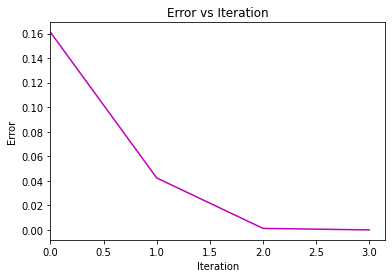

In [5]:
search_space = Space(1, target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

iteration = 0
error=[]
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()
    error.append(abs(search_space.gbest_value - search_space.target)) #menyimpan error
    if(abs(search_space.gbest_value - search_space.target) <= search_space.target_error):
        break

    search_space.move_particles()
    iteration += 1
    
print("Solusi Terbaik (Best Solution): ", search_space.gbest_position, " dalam jumlah iterasi: ", iteration)

#plot kurva error vs iterasi
plt.plot(error, c='m')
plt.title('Error vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.xlim(0)
plt.show()